# CS211: Data Privacy
## In-Class Exercises, week of 9/12/2022

In [2]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

adult = pd.read_csv('https://github.com/jnear/cs211-data-privacy/raw/master/homework/adult_with_pii.csv')

## Question 1

Write a *counting query* to determine whether or not Karrie Trusslove's age is 39.

In [3]:
# YOUR CODE HERE
def karrie_query():
    karries_row = adult[adult['Name'] == 'Karrie Trusslove']
    return karries_row[karries_row['Age'] == 39].shape[0]

In [4]:
# TEST CASE 

assert karrie_query() == 1

## Question 2

Add Laplace noise to the counting query you wrote in the last question to ensure differential privacy for $\epsilon = 1.0$.

In [11]:
# YOUR CODE HERE
epsilon = 1
sensitivity = 1
def dp_karrie_query():
    return karrie_query() + np.random.laplace(loc=0, scale=sensitivity/epsilon)

In [12]:
# TEST CASE 

q2_runs = [dp_karrie_query() for _ in range(100)]
noise_runs = [np.random.laplace(loc=1, scale=1/epsilon) for _ in range(100)]

assert stats.wasserstein_distance(q2_runs, noise_runs) < 1

## Question 3

In 2-4 sentences, describe how `dp_karrie_query` protects Karrie's privacy.

We add noise to introduce artificial uncertainty to the answer
The noise prevents us from making inferences about Karrie's age with 100% accuracy
I am roughly equally likely to see a particular answer for the query, regardless of carrie's age

## Question 4

Implement a function to construct an *empirical distribution* over random samples from the Laplace distribution with location 0 and scale `scale`. Use 1000 samples.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   3.,   2.,   2.,
          2.,   5.,   3.,   7.,   4.,   5.,  10.,  10.,  22.,  17.,  20.,
         27.,  36.,  58.,  69., 105., 122., 124.,  96.,  61.,  49.,  37.,
         25.,  23.,   9.,   7.,   4.,   8.,   4.,   9.,   1.,   3.,   2.,
          1.,   2.,   2.,   0.,   0.,   1.]),
 array([-3.91063532, -3.76963641, -3.6286375 , -3.48763858, -3.34663967,
        -3.20564076, -3.06464185, -2.92364294, -2.78264402, -2.64164511,
        -2.5006462 , -2.35964729, -2.21864838, -2.07764947, -1.93665055,
        -1.79565164, -1.65465273, -1.51365382, -1.37265491, -1.231656  ,
        -1.09065708, -0.94965817, -0.80865926, -0.66766035, -0.52666144,
        -0.38566253, -0.24466361, -0.1036647 ,  0.03733421,  0.17833312,
         0.31933203,  0.46033095,  0.60132986,  0.74232877,  0.88332768,
         1.02432659,  1.1653255 ,  1.30632442,  1.44732333,  1.58832224,
         1.72932115,  1.87032006,  2.01131897,  2.15231789,  2.2933168 ,
 

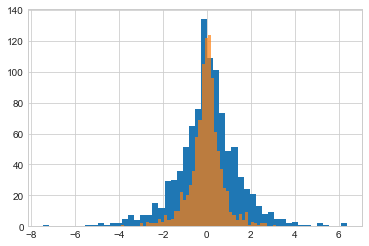

In [13]:
def empirical_dist_lap(scale):
    return [np.random.laplace(loc=0, scale=scale) for _ in range(1000)]
    
epsilon1 = 1.0
epsilon2 = 2.0

plt.hist(empirical_dist_lap(1/epsilon1), bins=50)
plt.hist(empirical_dist_lap(1/epsilon2), bins=50, alpha=.7)

In [ ]:
# PLACEHOLDER for test cases


In [14]:
np.exp(1)

2.718281828459045

-10.713128139876593 10.0 6.0 1.6666666666666667
-8.441269809997385 101.0 38.0 2.6578947368421053
-6.1694114801181765 897.0 338.0 2.6538461538461537
-3.897553150238968 8727.0 3273.0 2.666361136571952
-1.6256948203597599 64032.0 31515.0 2.031794383626844
0.6461635095194485 23500.0 57447.0 0.4090727104983724
2.918021839398657 2448.0 6629.0 0.3692864685472922
5.189880169277865 260.0 677.0 0.38404726735598227
7.461738499157073 21.0 68.0 0.3088235294117647
9.733596829036282 4.0 8.0 0.5


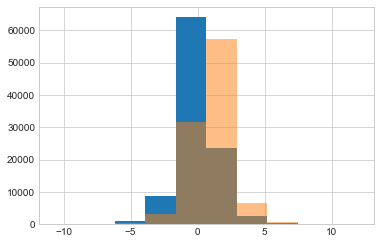

In [15]:
counts1, bins, _ = plt.hist([np.random.laplace(loc=0, scale=1/1) for _ in range(100000)], bins=10)
counts2, _, _ = plt.hist([np.random.laplace(loc=1, scale=1/1) for _ in range(100000)], bins=bins, alpha=.5)
list(zip(bins, counts1, counts2))

for bin_val, count1, count2 in zip(bins,counts1,counts2):
    print(bin_val, count1, count2, count1 / count2)

## Question 5

Consider the program below.

In [16]:
counting_query = lambda: 1

result_1 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)
result_2 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon2)
result_3 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)

print(result_1, result_2, result_3)

4.423026245201427 1.2651622820391621 7.595851209888898


Write a function `total_epsilon` that returns the total privacy cost for this program.

In [ ]:
def total_epsilon():
    return epsilon1 + epsilon2 + epsilon1

In [ ]:
# Placeholder for test case
